In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Impoting the required packages
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing.
import seaborn as sns
import random
import plotly.express as px
import matplotlib.pyplot as plt #For plotting
from datetime import date
from datetime import datetime
import io
import pandas as pd
from google.colab import files

In [ ]:
path_to_json_file = "/content/drive/My Drive/DA_DS_Tech_Assignment/assignment_dataset.json"

In [ ]:
#df = pd.read_json(io.StringIO(uploaded.get('assignment_dataset.json').decode('utf-8')))
df = pd.read_json(path_to_json_file)
df.to_csv("/content/drive/My Drive/DA_DS_Tech_Assignment/shipment.csv")

In [ ]:
df.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,portcast_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
0,KOCU4806726,HDMU,CNNGB,None,None,USNYC,None,None,2021-06-12T18:00:00,None,Vessel arrival,1.0,2021-06-12T18:00:00
1,KOCU4138843,HDMU,VNVUT,None,None,USORF,2021-06-13T16:00:00-05:00,None,2021-06-14T02:50:07.504794-05:00,None,Unclassified,1.0,2021-06-12T20:00:00
2,HDMU4753869,HDMU,VNVUT,None,None,USSAV,2021-06-16T14:00:00-05:00,None,2021-06-17T15:21:59.522328-05:00,None,Unclassified,1.0,2021-06-15T19:00:00
3,KOCU4823359,HDMU,CNNGB,None,None,USNYC,None,None,2021-05-16T19:00:00,None,Vessel arrival,1.0,2021-05-16T19:00:00
4,MSCU5135983,MSCU,VNSGN,None,None,USLGB,None,None,2021-06-04T00:00:00,None,Vessel arrival,2.0,2021-06-04T00:00:00


In [ ]:
df.shape

(1956, 13)

In [ ]:
df.columns

Index(['cntr_no', 'carrier_no', 'pol', 'scheduled_pol_etd', 'pol_atd', 'pod',
       'scheduled_pod_eta', 'pod_ata', 'portcast_predicted_pod_eta',
       'container_pod_actual_discharge', 'last_container_event', 'vessel_legs',
       'container_pod_scheduled_discharge'],
      dtype='object')

In [ ]:
df.isnull().sum()

cntr_no                                 0
carrier_no                              0
pol                                   193
scheduled_pol_etd                     796
pol_atd                              1088
pod                                   196
scheduled_pod_eta                     893
pod_ata                              1752
portcast_predicted_pod_eta            388
container_pod_actual_discharge       1668
last_container_event                  184
vessel_legs                           184
container_pod_scheduled_discharge     437
dtype: int64

1. ship travelling behaviours
2. inbound ship delays

In [ ]:
df.describe()

,vessel_legs
count,1772.000000
mean,1.142212
std,0.378832
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [ ]:
df.isnull().sum()

cntr_no                                 0
carrier_no                              0
pol                                   193
scheduled_pol_etd                     796
pol_atd                              1088
pod                                   196
scheduled_pod_eta                     893
pod_ata                              1752
portcast_predicted_pod_eta            388
container_pod_actual_discharge       1668
last_container_event                  184
vessel_legs                           184
container_pod_scheduled_discharge     437
dtype: int64

In [ ]:
df['scheduled_pod_eta'] =  pd.to_datetime(df['scheduled_pod_eta'], format= "%Y-%m-%dT%H:%M:%S.%f")
df['pol_atd'] =  pd.to_datetime(df['pol_atd'], format= "%Y-%m-%dT%H:%M:%S.%f")
df['portcast_predicted_pod_eta'] =  pd.to_datetime(df['portcast_predicted_pod_eta'], format= "%Y-%m-%dT%H:%M:%S.%f")
df['container_pod_scheduled_discharge'] =  pd.to_datetime(df['container_pod_scheduled_discharge'], format= "%Y-%m-%dT%H:%M:%S.%f")
df.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,portcast_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
0,KOCU4806726,HDMU,CNNGB,None,None,USNYC,None,None,2021-06-12 18:00:00,None,Vessel arrival,1.0,2021-06-12 18:00:00
1,KOCU4138843,HDMU,VNVUT,None,None,USORF,2021-06-13 16:00:00-05:00,None,2021-06-14 02:50:07.504794-05:00,None,Unclassified,1.0,2021-06-12 20:00:00
2,HDMU4753869,HDMU,VNVUT,None,None,USSAV,2021-06-16 14:00:00-05:00,None,2021-06-17 15:21:59.522328-05:00,None,Unclassified,1.0,2021-06-15 19:00:00
3,KOCU4823359,HDMU,CNNGB,None,None,USNYC,None,None,2021-05-16 19:00:00,None,Vessel arrival,1.0,2021-05-16 19:00:00
4,MSCU5135983,MSCU,VNSGN,None,None,USLGB,None,None,2021-06-04 00:00:00,None,Vessel arrival,2.0,2021-06-04 00:00:00


In [ ]:
df.dtypes

cntr_no                                      object
carrier_no                                   object
pol                                          object
scheduled_pol_etd                            object
pol_atd                                      object
pod                                          object
scheduled_pod_eta                            object
pod_ata                                      object
portcast_predicted_pod_eta                   object
container_pod_actual_discharge               object
last_container_event                         object
vessel_legs                                 float64
container_pod_scheduled_discharge    datetime64[ns]
dtype: object

In [ ]:
df["carrier_no"].value_counts()

ONEY    375
COSU    356
CMDU    319
HLCU    315
OOLU    187
MAEU    161
HDMU    126
MSCU     52
ZIMU     47
MEDU     11
TOLL      6
YMLU      1
Name: carrier_no, dtype: int64

In [ ]:
carrier_counts = df["carrier_no"].value_counts()
fig = px.bar(carrier_counts[:15], title="carrier_no")
fig.update_layout(
    xaxis_title = "carrier_no",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [ ]:
df['pol'].value_counts()

CNSHG    306
CNYTN    284
VNVUT    267
VNCMT    233
CNNGB    228
CNXMG     90
INMUN     66
CNQDG     53
INNSA     37
VNHPH     35
MYTPP     33
CNFOC     29
TWKHH     24
KHKOS     13
ITGOA     11
VNSGN     10
CNDLC      9
CNTXG      5
PHMNL      5
ITNAP      3
CNZUH      3
MYPKG      3
PLGDN      2
PKKHI      2
THLCH      2
IDJKT      1
JPYOK      1
BGVAR      1
CNFQG      1
ITPMO      1
ESALG      1
KHPNH      1
CNNKG      1
DEBRV      1
USLAX      1
Name: pol, dtype: int64

In [ ]:
pol_counts = df["pol"].value_counts()
fig = px.bar(pol_counts[:15], title="POL")
fig.update_layout(
    xaxis_title = "pol",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [ ]:
df["pod"].value_counts()

USNYC    747
USSAV    326
USLAX    203
USLGB    128
USMOB     93
CAVAN     77
USTIW     55
USORF     47
USSEA     41
USBAL     12
USVAN     10
BRFOR      8
USHOU      6
CAPRR      3
HKHKG      2
CNSHG      1
JPFKY      1
Name: pod, dtype: int64

In [ ]:
pol_counts = df["pod"].value_counts()
fig = px.bar(pol_counts[:15], title="POD")
fig.update_layout(
    xaxis_title = "pod",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [ ]:
df['scheduled_pol_etd'] =  pd.to_datetime(df['scheduled_pol_etd'], format= "%Y-%m-%dT%H:%M:%S.%f", utc=True)
df['scheduled_pod_eta'] =  pd.to_datetime(df['scheduled_pod_eta'], format= "%Y-%m-%dT%H:%M:%S.%f", utc=True)
df['pol_atd'] =  pd.to_datetime(df['pol_atd'], format= "%Y-%m-%dT%H:%M:%S.%f", utc=True)
df['pod_ata'] =  pd.to_datetime(df['pod_ata'], format= "%Y-%m-%dT%H:%M:%S.%f", utc=True)
df['portcast_predicted_pod_eta'] =  pd.to_datetime(df['portcast_predicted_pod_eta'], format= "%Y-%m-%dT%H:%M:%S.%f", utc=True)
#df['container_pod_scheduled_discharge'] =  pd.to_datetime(df['container_pod_scheduled_discharge'], format= "%Y-%m-%dT%H:%M:%S.%f")
df.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,portcast_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
0,KOCU4806726,HDMU,CNNGB,NaT,NaT,USNYC,NaT,NaT,2021-06-12 18:00:00+00:00,None,Vessel arrival,1.0,2021-06-12 18:00:00
1,KOCU4138843,HDMU,VNVUT,NaT,NaT,USORF,2021-06-13 21:00:00+00:00,NaT,2021-06-14 07:50:07.504794+00:00,None,Unclassified,1.0,2021-06-12 20:00:00
2,HDMU4753869,HDMU,VNVUT,NaT,NaT,USSAV,2021-06-16 19:00:00+00:00,NaT,2021-06-17 20:21:59.522328+00:00,None,Unclassified,1.0,2021-06-15 19:00:00
3,KOCU4823359,HDMU,CNNGB,NaT,NaT,USNYC,NaT,NaT,2021-05-16 19:00:00+00:00,None,Vessel arrival,1.0,2021-05-16 19:00:00
4,MSCU5135983,MSCU,VNSGN,NaT,NaT,USLGB,NaT,NaT,2021-06-04 00:00:00+00:00,None,Vessel arrival,2.0,2021-06-04 00:00:00


In [ ]:
df['pol'].fillna("no pol", inplace = True)
df['pod'].fillna("no pod", inplace = True)
df['vessel_legs'].fillna(method = 'ffill', inplace = True)
df['last_container_event'].fillna("Unclassified", inplace = True)

In [ ]:
df['carrier_no'].value_counts()

ONEY    375
COSU    356
CMDU    319
HLCU    315
OOLU    187
MAEU    161
HDMU    126
MSCU     52
ZIMU     47
MEDU     11
TOLL      6
YMLU      1
Name: carrier_no, dtype: int64

In [ ]:
df.dtypes

cntr_no                                           object
carrier_no                                        object
pol                                               object
scheduled_pol_etd                    datetime64[ns, UTC]
pol_atd                              datetime64[ns, UTC]
pod                                               object
scheduled_pod_eta                    datetime64[ns, UTC]
pod_ata                              datetime64[ns, UTC]
portcast_predicted_pod_eta           datetime64[ns, UTC]
container_pod_actual_discharge                    object
last_container_event                              object
vessel_legs                                      float64
container_pod_scheduled_discharge         datetime64[ns]
dtype: object

# last_container_event

In [ ]:
df['last_container_event'].value_counts()

Unclassified                        574
Vessel arrival                      536
Unload from vessel                  405
Vessel departure                    205
Gate out                            141
Gate in                              56
Loaded onto vessel                   16
Container delivered to consignee     13
Empty container pick-up               5
Empty container returned              5
Name: last_container_event, dtype: int64

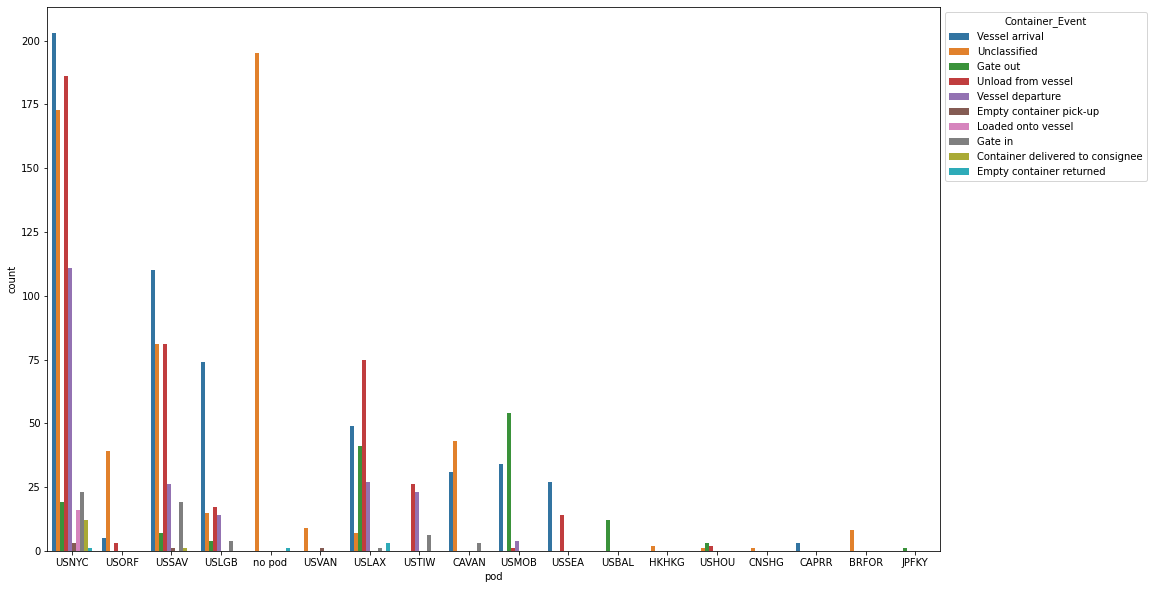

In [ ]:
# plot and add annotations
plt.figure(figsize=(16,10))
p = sns.countplot(x='pod',hue='last_container_event',data=df)
p.legend(title='Container_Event', bbox_to_anchor=(1, 1), loc='upper left')

# for c in p.containers:
#     # set the bar label
#     p.bar_label(c, fmt='%.0f', label_type='edge')
    

# Port of loading

In [ ]:
df1 = df[['carrier_no', 'pol', 'scheduled_pol_etd', 'pol_atd']] 
df1.head()

,carrier_no,pol,scheduled_pol_etd,pol_atd
0,HDMU,CNNGB,NaT,NaT
1,HDMU,VNVUT,NaT,NaT
2,HDMU,VNVUT,NaT,NaT
3,HDMU,CNNGB,NaT,NaT
4,MSCU,VNSGN,NaT,NaT


In [ ]:
df1.groupby('pol')['carrier_no'].value_counts().sort_values(ascending=False)

pol     carrier_no
VNCMT   ONEY          165
CNSHG   CMDU          118
VNVUT   HLCU          113
no pol  COSU          103
CNYTN   COSU           70
                     ... 
PHMNL   MAEU            1
USLAX   CMDU            1
TWKHH   HDMU            1
PKKHI   CMDU            1
BGVAR   MAEU            1
Name: carrier_no, Length: 109, dtype: int64

## Average number of carrier scheduled_port_loading of Estimated Time of Departure (ETD)¶


Here it can be seen that there are a handful of ports that receive very large volumes of visits per day. The large number of daily visits to both Actual Time of Departure (ATD)

In [ ]:
carrier_arrivals = df1.groupby(['pol','scheduled_pol_etd'])['carrier_no'].count()

In [ ]:
carrier_arrivals = carrier_arrivals.groupby(['pol']).mean()
carrier_arrivals = carrier_arrivals.sort_values(ascending = False)

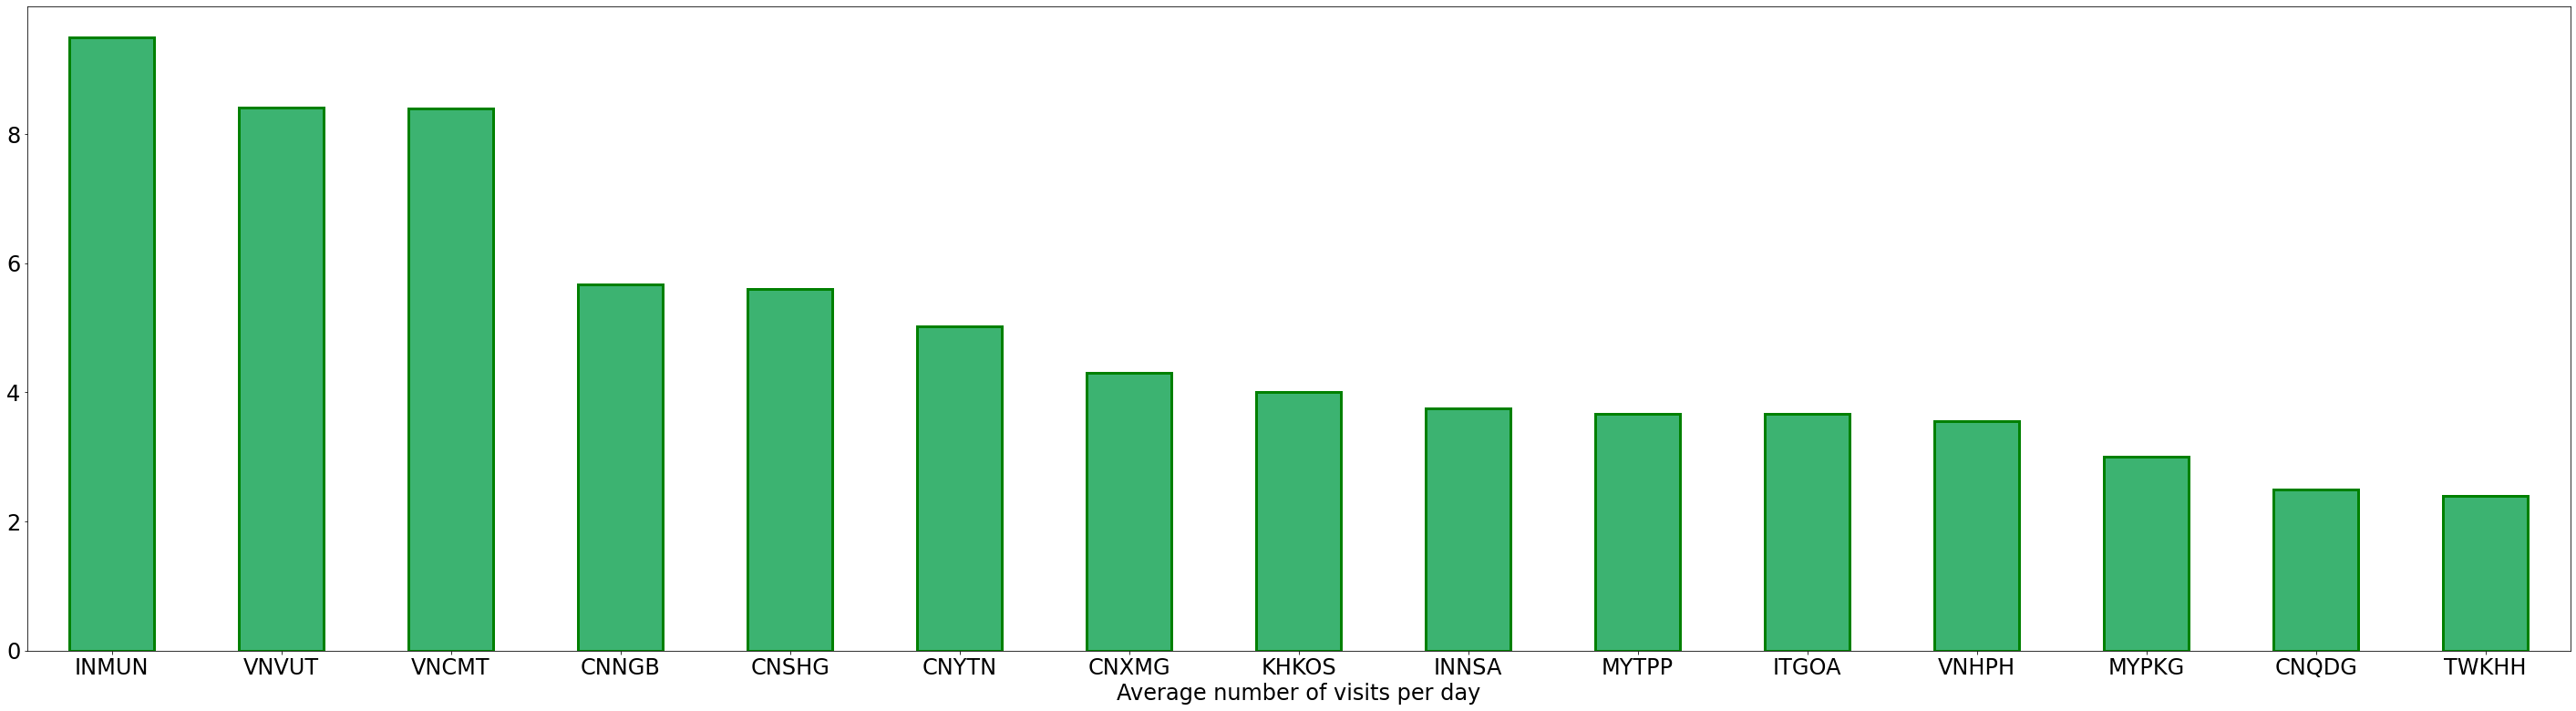

In [ ]:
plt.figure(figsize=(50,13))
carrier_arrivals.iloc[:15].plot(kind='bar', color = 'mediumseagreen', edgecolor = 'green', linewidth=3)
plt.xlabel('Average number of visits per day',fontsize=24)
plt.xticks(fontsize=24,rotation=0)
plt.yticks(fontsize=24)
plt.show()

## Average number port of loading_ Actual Time of Departure (ATD) of visits per day

Here it can be seen that there are a handful of ports that receive very large volumes of visits per day. The large number of daily visits to both

In [ ]:
carrier_arrivals = df1.groupby(['pol','pol_atd'])['carrier_no'].count()

In [ ]:
carrier_arrivals = carrier_arrivals.groupby(['pol']).mean()
carrier_arrivals = carrier_arrivals.sort_values(ascending = False)

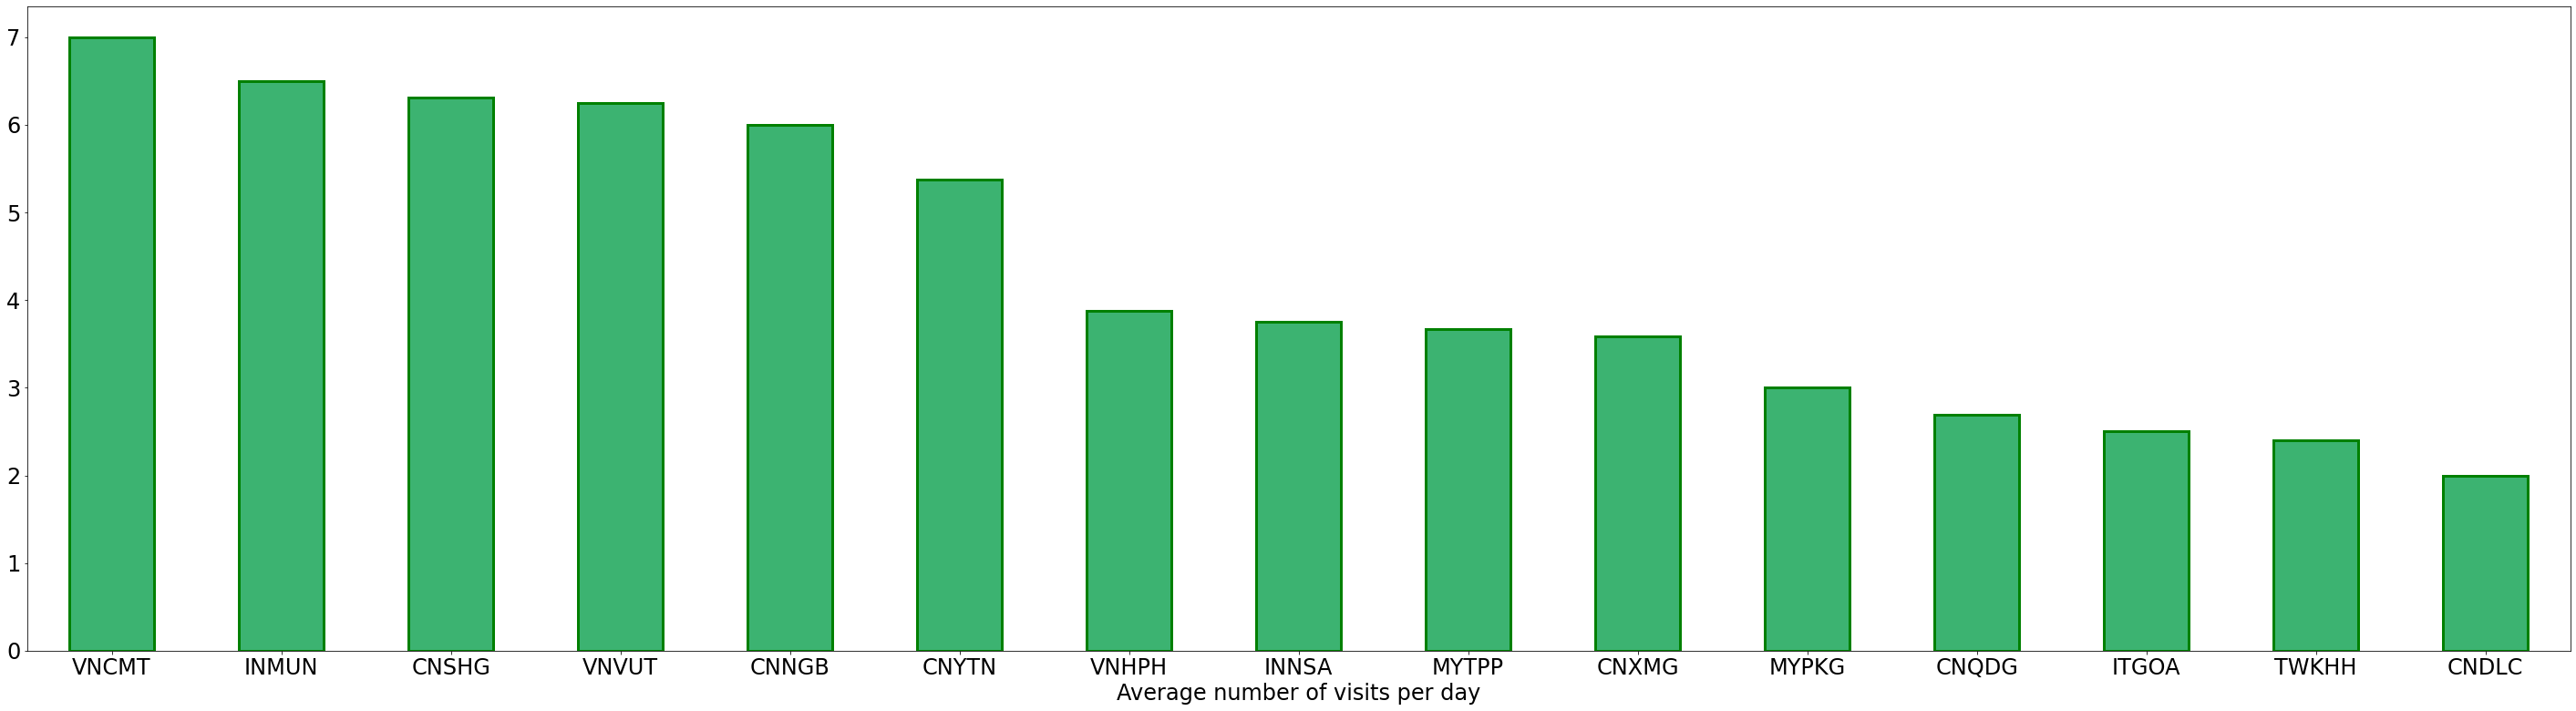

In [ ]:
plt.figure(figsize=(50,13))
carrier_arrivals.iloc[:15].plot(kind='bar', color = 'mediumseagreen', edgecolor = 'green', linewidth=3)
plt.xlabel('Average number of visits per day',fontsize=24)
plt.xticks(fontsize=24,rotation=0)
plt.yticks(fontsize=24)
plt.show()

In [ ]:
df1.head()

,carrier_no,pol,scheduled_pol_etd,pol_atd
0,HDMU,CNNGB,NaT,NaT
1,HDMU,VNVUT,NaT,NaT
2,HDMU,VNVUT,NaT,NaT
3,HDMU,CNNGB,NaT,NaT
4,MSCU,VNSGN,NaT,NaT


## difference between scheduled_pol_etd and pol_atd by days¶
Actual Time of Departure (ATD) & Estimated Time of Departure (ATD)

In [ ]:
df1['pol_atd'] = pd.to_datetime(df1.pol_atd).dt.tz_localize(None)
df1['scheduled_pol_etd'] = pd.to_datetime(df1.scheduled_pol_etd).dt.tz_localize(None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1['dif_pol'] = df1['pol_atd'] - df1['scheduled_pol_etd'] 
#  Actual Time of Departure (ATD) - Estimated Time of Departure (ETD)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,carrier_no,pol,scheduled_pol_etd,pol_atd,dif_pol
0,HDMU,CNNGB,NaT,NaT,NaT
1,HDMU,VNVUT,NaT,NaT,NaT
2,HDMU,VNVUT,NaT,NaT,NaT
3,HDMU,CNNGB,NaT,NaT,NaT
4,MSCU,VNSGN,NaT,NaT,NaT


In [ ]:
scheduled_departure = df1.count()['scheduled_pol_etd'] 
actual_departure = df1.count()['dif_pol']  
cancel_departure = scheduled_departure - actual_departure
ratio_oper = actual_departure / scheduled_departure * 100

ratio_cancel = 100 - ratio_oper
                                            
print("scheduled_loading: ", scheduled_departure)
print("actual_loading: ", actual_departure)
print("cancel_loading: ", cancel_departure)
print("\n")
print("Ratio operated vessels over scheduled loading: %s" % ratio_oper)
print("Ratio of cancelled vessels: %s" % ratio_cancel)

scheduled_loading:  1160
actual_loading:  868
cancel_loading:  292


Ratio operated vessels over scheduled loading: 74.82758620689656
Ratio of cancelled vessels: 25.172413793103445


In [ ]:
delay = df1.groupby('dif_pol')['carrier_no'].value_counts().sort_values(ascending=False).reset_index(name='count') 
delay.dif_pol.sort_values(ascending=False)
delay

,dif_pol,carrier_no,count
0,0 days 00:00:00,ONEY,229
1,0 days 00:00:00,MAEU,43
2,0 days 00:24:00,HLCU,26
3,1 days 05:39:23,CMDU,23
4,2 days 16:15:31.090000,CMDU,22
...,...,...,...
131,1 days 00:30:04,CMDU,1
132,1 days 03:49:52.960000,HLCU,1
133,1 days 09:55:04,MAEU,1
134,1 days 20:20:20.720000,CMDU,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



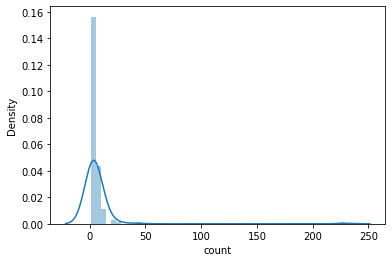

In [ ]:
#histogram
sns.distplot(delay['count'])
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % delay['count'].skew())
print("Kurtosis: %f" % delay['count'].kurt())

Skewness: 10.508397
Kurtosis: 117.197090


# Port of Delivery

In [ ]:
df2 = df[['carrier_no', 'pod', 'scheduled_pod_eta', 'pod_ata']] # Estimated Time of Arrival (ETA) & Actual Time of Arrival (ATA)

In [ ]:
df2.groupby('pod')['carrier_no'].value_counts().sort_values(ascending=False)

pod     carrier_no
USNYC   ONEY          164
        CMDU          157
        HLCU          135
        COSU          130
no pod  COSU          103
                     ... 
CNSHG   COSU            1
USHOU   COSU            1
USLGB   HLCU            1
        MEDU            1
USSAV   YMLU            1
Name: carrier_no, Length: 68, dtype: int64

## Average number of carriers in scheduled_port of Estimated Time of Departure (ETD)
Here it can be seen that there are a handful of ports that receive very large volumes of visits per day. The large number of daily visits to both Actual Time of Departure (ATD)

In [ ]:
carrier_arrivals = df2.groupby(['pod','scheduled_pod_eta'])['carrier_no'].count()

In [ ]:
carrier_arrivals = carrier_arrivals.groupby(['pod']).mean()
carrier_arrivals = carrier_arrivals.sort_values(ascending = False)

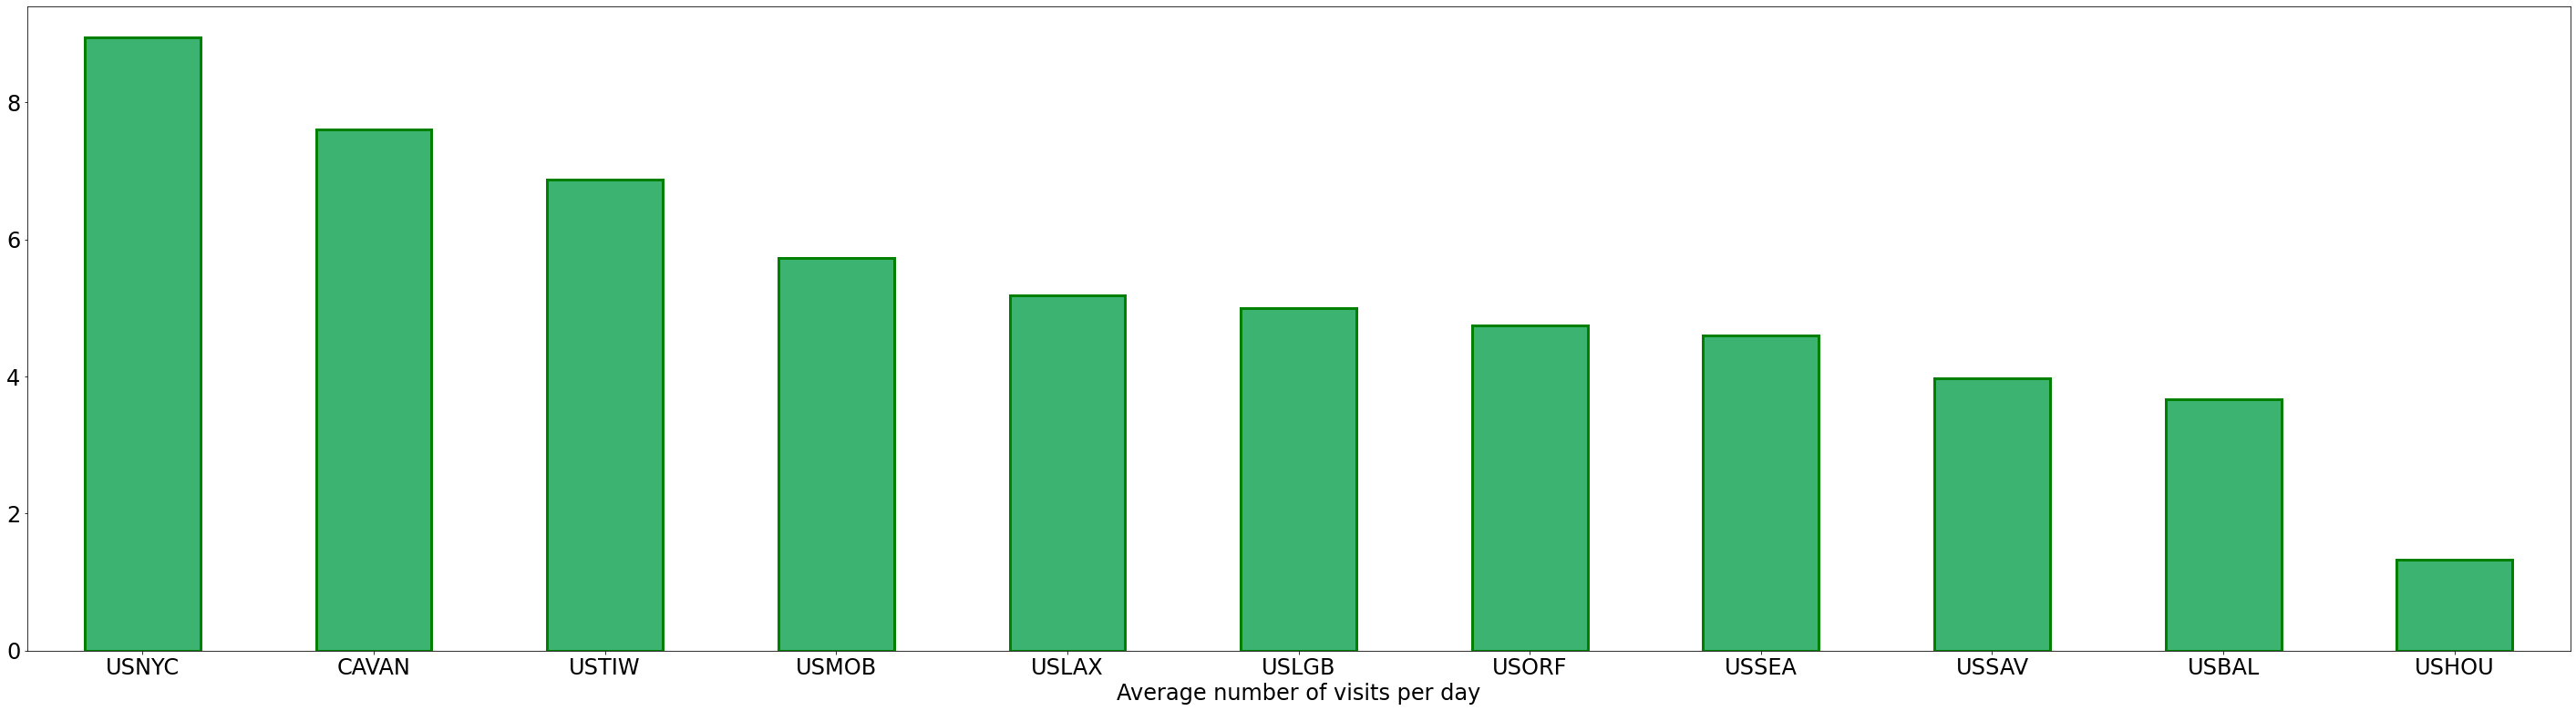

In [ ]:
plt.figure(figsize=(50,13))
carrier_arrivals.iloc[:15].plot(kind='bar', color = 'mediumseagreen', edgecolor = 'green', linewidth=3)
plt.xlabel('Average number of visits per day',fontsize=24)
plt.xticks(fontsize=24,rotation=0)
plt.yticks(fontsize=24)
plt.show()

## Average number port of loading_ Actual Time of Departure (ATD) of visits per day¶
Here it can be seen that there are a handful of ports that receive very large volumes of visits per day. The large number of daily visits to both

In [ ]:
carrier_arrivals = df2.groupby(['pod','pod_ata'])['carrier_no'].count()

In [ ]:
carrier_arrivals = carrier_arrivals.groupby(['pod']).mean()
carrier_arrivals = carrier_arrivals.sort_values(ascending = False)

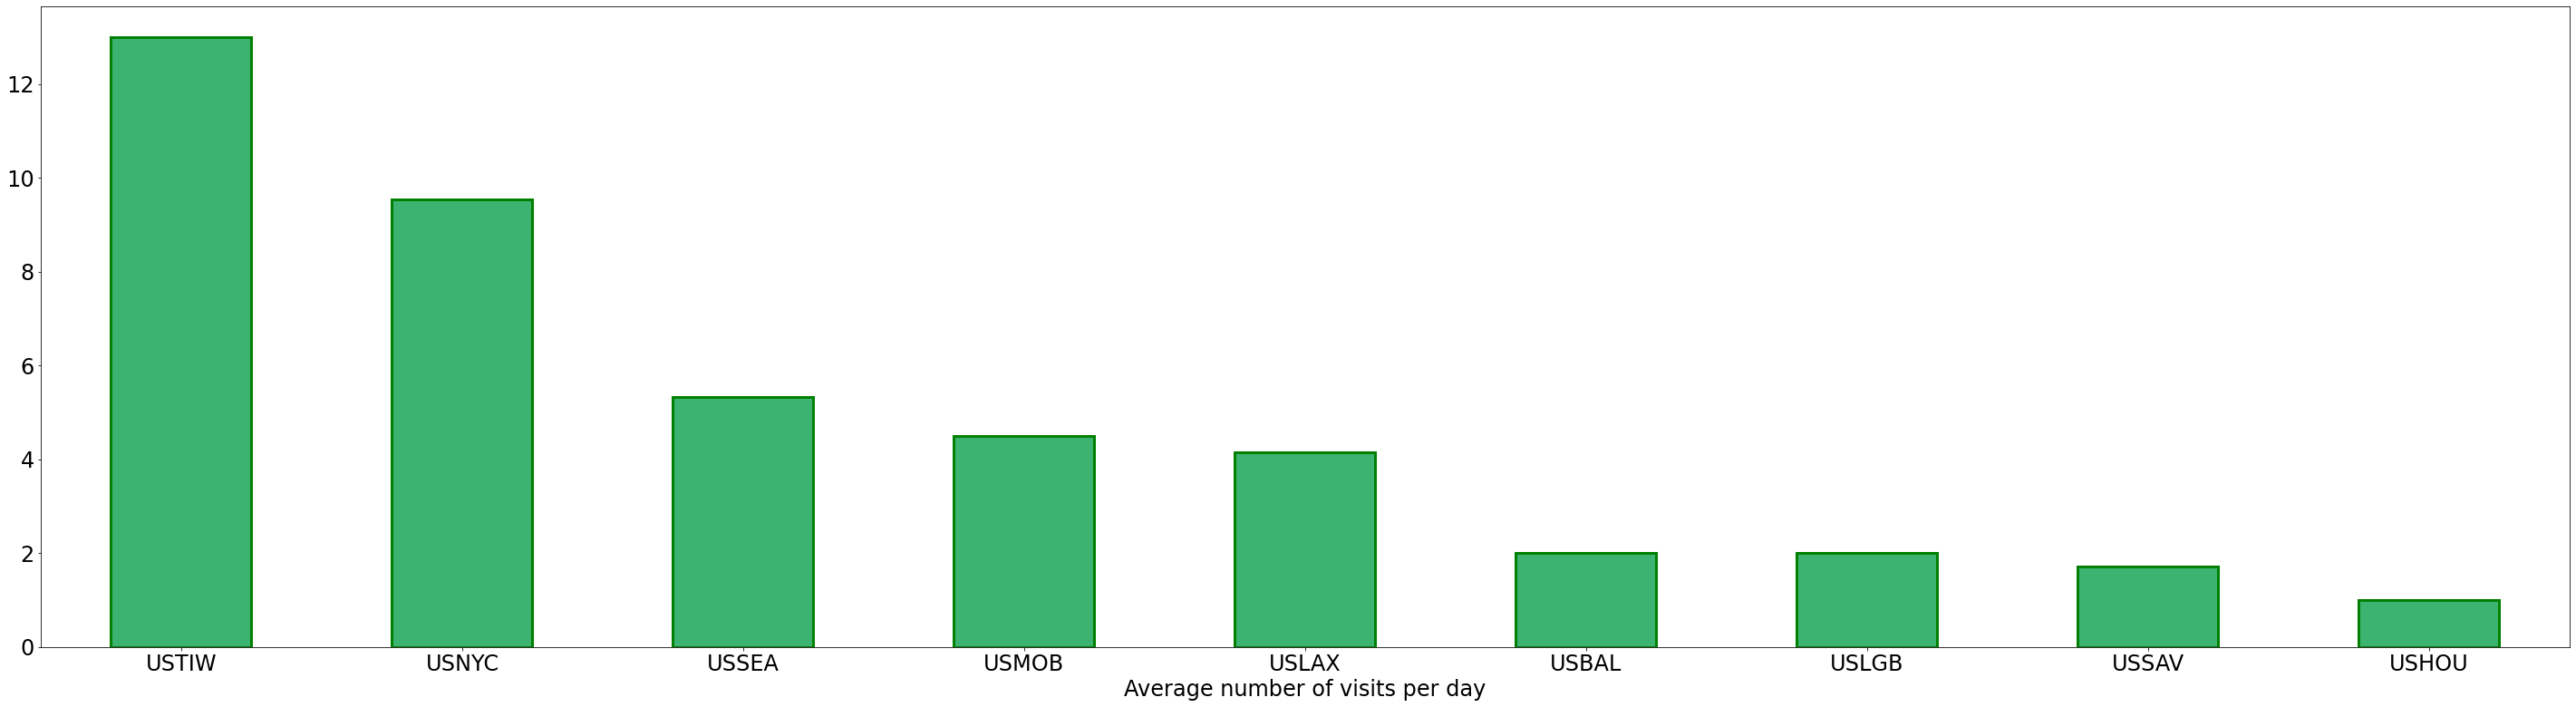

In [ ]:
plt.figure(figsize=(50,13))
carrier_arrivals.iloc[:15].plot(kind='bar', color = 'mediumseagreen', edgecolor = 'green', linewidth=3)
plt.xlabel('Average number of visits per day',fontsize=24)
plt.xticks(fontsize=24,rotation=0)
plt.yticks(fontsize=24)
plt.show()

## difference between scheduled_pod_eta and pod_ata by days
Actual Time of Departure (ATD) & Estimated Time of Departure (ATD)

In [ ]:
df2['pod_ata'] = pd.to_datetime(df2.pod_ata).dt.tz_localize(None)
df2['scheduled_pod_eta'] = pd.to_datetime(df2.scheduled_pod_eta).dt.tz_localize(None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2['dif_pol'] = df2['pod_ata']-df2['scheduled_pod_eta'] 
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,carrier_no,pod,scheduled_pod_eta,pod_ata,dif_pol
0,HDMU,USNYC,NaT,NaT,NaT
1,HDMU,USORF,2021-06-13 21:00:00,NaT,NaT
2,HDMU,USSAV,2021-06-16 19:00:00,NaT,NaT
3,HDMU,USNYC,NaT,NaT,NaT
4,MSCU,USLGB,NaT,NaT,NaT


In [ ]:
scheduled_departure = df2.count()['scheduled_pod_eta'] 
actual_departure = df2.count()['pod_ata']  
cancel_departure = scheduled_departure - actual_departure
ratio_oper = actual_departure / scheduled_departure * 100

ratio_cancel = 100 - ratio_oper
                                            
print("scheduled_departure: ", scheduled_departure)
print("actual_departure: ", actual_departure)
print("cancel_departure: ", cancel_departure)
print("\n")
print("Ratio operated flights over scheduled vessels: %s" % ratio_oper)
print("Ratio of cancelled vessels: %s" % ratio_cancel)

scheduled_departure:  1063
actual_departure:  204
cancel_departure:  859


Ratio operated flights over scheduled vessels: 19.19096895578551
Ratio of cancelled vessels: 80.80903104421449


In [ ]:
delay = df2.groupby('dif_pol')['carrier_no'].value_counts().sort_values(ascending=False).reset_index(name='count') 
delay.dif_pol.sort_values(ascending=False)
delay

,dif_pol,carrier_no,count
0,0 days 00:00:00,ONEY,68
1,1 days 06:48:12.670000,CMDU,36
2,0 days 00:00:00,MAEU,20
3,1 days 02:12:00,HLCU,8
4,-1 days +21:22:49,COSU,8
5,5 days 02:23:55.020000,CMDU,7
6,3 days 03:30:08,HLCU,7
7,8 days 02:16:14,CMDU,6
8,-1 days +17:06:29,OOLU,5
9,1 days 06:48:12.670000,COSU,5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



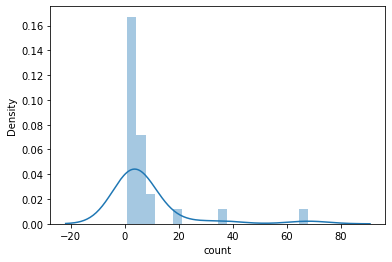

In [ ]:
#histogram
sns.distplot(delay['count'])
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % delay['count'].skew())
print("Kurtosis: %f" % delay['count'].kurt())

Skewness: 3.456480
Kurtosis: 12.764507


In [ ]:
delays = delay.set_index('dif_pol')
delays.index

TimedeltaIndex([         '0 days 00:00:00',   '1 days 06:48:12.670000',
                         '0 days 00:00:00',          '1 days 02:12:00',
                       '-1 days +21:22:49',   '5 days 02:23:55.020000',
                         '3 days 03:30:08',          '8 days 02:16:14',
                       '-1 days +17:06:29',   '1 days 06:48:12.670000',
                         '1 days 03:55:05',          '3 days 19:35:04',
                         '1 days 23:45:01',          '0 days 11:10:07',
                       '-4 days +23:57:00',        '-1 days +23:47:45',
                       '-1 days +21:22:49',        '-1 days +08:01:40',
                         '1 days 09:30:01',          '0 days 03:54:59',
                         '0 days 02:45:06',          '1 days 11:02:07',
                         '2 days 01:50:22',        '-3 days +17:40:11',
                '-4 days +11:51:54.670000'],
               dtype='timedelta64[ns]', name='dif_pol', freq=None)

In [ ]:
y = delays['count'].resample('D').mean()

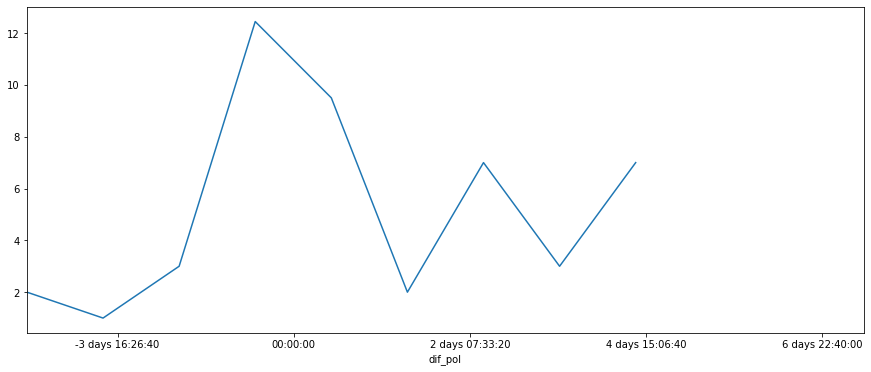

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

# Performance improvement from using Portcast predictions

In [ ]:
df['pod_ata'] = pd.to_datetime(df.pod_ata).dt.tz_localize(None)
df['portcast_predicted_pod_eta'] = pd.to_datetime(df.portcast_predicted_pod_eta).dt.tz_localize(None)

In [ ]:
df3 = df.copy()
df3.pod_ata = df3.pod_ata.fillna(value=df3.container_pod_actual_discharge)
df3['diff_forecast_errors'] = df3['pod_ata'] - df3['portcast_predicted_pod_eta']
#df3['diff_forecast_errors_day'] = df3['diff_forecast_errors'].round('D')
df3.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,portcast_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge,diff_forecast_errors
0,KOCU4806726,HDMU,CNNGB,NaT,NaT,USNYC,NaT,NaT,2021-06-12 18:00:00.000000,None,Vessel arrival,1.0,2021-06-12 18:00:00,NaT
1,KOCU4138843,HDMU,VNVUT,NaT,NaT,USORF,2021-06-13 21:00:00+00:00,NaT,2021-06-14 07:50:07.504794,None,Unclassified,1.0,2021-06-12 20:00:00,NaT
2,HDMU4753869,HDMU,VNVUT,NaT,NaT,USSAV,2021-06-16 19:00:00+00:00,NaT,2021-06-17 20:21:59.522328,None,Unclassified,1.0,2021-06-15 19:00:00,NaT
3,KOCU4823359,HDMU,CNNGB,NaT,NaT,USNYC,NaT,NaT,2021-05-16 19:00:00.000000,None,Vessel arrival,1.0,2021-05-16 19:00:00,NaT
4,MSCU5135983,MSCU,VNSGN,NaT,NaT,USLGB,NaT,NaT,2021-06-04 00:00:00.000000,None,Vessel arrival,2.0,2021-06-04 00:00:00,NaT


In [ ]:
mean_forecast_error = df3['diff_forecast_errors'].mean()
mean_forecast_error

Timedelta('1 days 01:23:36.143281137')

# discovery of anomalies in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



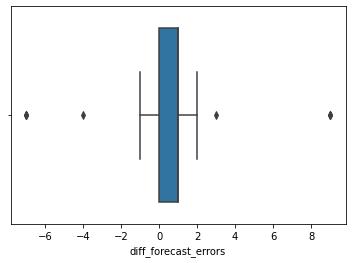

In [ ]:
from seaborn import boxplot
df3['diff_forecast_errors'] = df3['diff_forecast_errors'].dt.days
boxplot(df3.diff_forecast_errors)

In [ ]:
from sklearn.ensemble import IsolationForest

df3.dropna(subset=['diff_forecast_errors'], how='all', inplace=True)
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df3[['diff_forecast_errors']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1, n_estimators=50)

In [ ]:
df3['scores']=model.decision_function(df3[['diff_forecast_errors']])
df3['anomaly']=model.predict(df3[['diff_forecast_errors']])
df3.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,portcast_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge,diff_forecast_errors,scores,anomaly
21,HLXU8124680,HLCU,VNVUT,2021-03-31 04:00:00+00:00,2021-03-31 04:21:00+00:00,USVAN,NaT,2021-05-17 07:19:00,2021-05-14 15:00:00.000000,2021-05-17T07:19:00,Unclassified,1.0,NaT,2.0,0.056023,1
172,HLBU2805267,HLCU,INMUN,2021-05-05 18:30:00+00:00,2021-05-05 21:45:01.190000+00:00,USNYC,2021-05-27 05:00:00+00:00,2021-05-27 14:05:00,2021-06-02 18:36:58.801659,2021-05-27T14:05:00,Unclassified,1.0,NaT,-7.0,-0.249389,-1
261,OOLU9360664,COSU,PHMNL,NaT,NaT,HKHKG,NaT,2020-11-19 14:42:00,2020-11-19 14:42:00.000000,2020-11-19T14:42:00,Unclassified,2.0,2020-11-19 14:42:00,0.0,0.081832,1
360,TGBU9313830,CMDU,CNNGB,2021-04-12 12:24:00+00:00,2021-04-12 12:24:00+00:00,USNYC,2021-05-15 12:00:00+00:00,2021-05-17 04:08:00,2021-05-15 07:00:00.000000,2021-05-17T04:08:00,Unclassified,1.0,NaT,1.0,0.108432,1
363,TCKU4734702,CMDU,CNNGB,2021-04-12 12:24:00+00:00,2021-04-12 12:24:00+00:00,USNYC,2021-05-15 12:00:00+00:00,2021-05-16 23:15:00,2021-05-15 07:00:00.000000,2021-05-16T23:15:00,Container delivered to consignee,1.0,NaT,1.0,0.108432,1


In [ ]:
anomaly=df3.loc[df3['anomaly']==-1]
anomaly_index=list(anomaly.index)
anomaly.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,portcast_predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge,diff_forecast_errors,scores,anomaly
172,HLBU2805267,HLCU,INMUN,2021-05-05 18:30:00+00:00,2021-05-05 21:45:01.190000+00:00,USNYC,2021-05-27 05:00:00+00:00,2021-05-27 14:05:00,2021-06-02 18:36:58.801659,2021-05-27T14:05:00,Unclassified,1.0,NaT,-7.0,-0.249389,-1
1349,UACU5244732,HLCU,INMUN,2021-05-05 18:30:00+00:00,2021-05-05 21:45:01.190000+00:00,USNYC,2021-05-27 05:00:00+00:00,2021-05-27 00:34:00,2021-06-02 18:36:58.801659,2021-05-27T00:34:00,Unclassified,1.0,NaT,-7.0,-0.249389,-1
1380,BMOU6606595,HLCU,INMUN,2021-05-05 18:30:00+00:00,2021-05-05 21:45:01.190000+00:00,USNYC,2021-05-27 05:00:00+00:00,2021-05-27 00:40:00,2021-06-02 18:36:58.801659,2021-05-27T00:40:00,Unclassified,1.0,NaT,-7.0,-0.249389,-1
1855,CAIU9869830,MSCU,MYPKG,2021-04-08 09:00:00+00:00,2021-04-11 15:25:41+00:00,USLGB,NaT,2021-05-21 00:00:00,2021-05-12 00:00:00.000000,2021-05-21T00:00:00,Unload from vessel,1.0,NaT,9.0,-0.268907,-1
1858,MEDU7623330,MSCU,MYPKG,2021-04-08 09:00:00+00:00,2021-04-11 15:25:41+00:00,USLGB,NaT,2021-05-21 00:00:00,2021-05-12 00:00:00.000000,2021-05-21T00:00:00,Unload from vessel,1.0,NaT,9.0,-0.268907,-1


As we can see clarly -1 as a anomaly in dataset

In [ ]:
anomaly.to_csv("/content/drive/My Drive/DA_DS_Tech_Assignment/anomalies.csv", index=False, encoding='utf-8-sig')